# Weather Feature Analysis and Normalization Techniques

This notebook explores the weather-related features in our wildfire dataset and evaluates different normalization techniques (min-max scaling vs. z-score normalization) to determine which is most appropriate for our data.

In [22]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler ,QuantileTransformer , PowerTransformer , RobustScaler

# Set plotting styles
plt.style.use('ggplot')
sns.set_context('notebook')

# Load the dataset
data_path = r'D:\FCAI\data_science\project\wildfire_prediction\wildfire_prediction\data\processed\merged\merged_fire_weather.csv'
df = pd.read_csv(data_path)

# Display basic information
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (1979454, 40)


,grid_id,week,latitude,longitude,acq_date,frp_log,brightness_normalized,fire,ppt,tmax,...,month_cos,tmax_7day_mean,ppt_7day_mean,vbd_7day_mean,fire_weather_index,drought_weather_index,fire_risk_index,date_bin,distance_km,temporal_offset_days
0,11S_457_3739,2013-04-01/2013-04-07,33.791667,-117.458333,2013-04-01,0.438255,0.133750,1,0.000,20.807,...,-0.5,20.016429,0.000000,12.320714,3.433206,1.859924,2.605916,2013-03-26_2013-04-01,1.731821,0.0
1,11S_374_3887,2013-04-01/2013-04-07,35.125000,-118.375000,2013-04-01,0.418710,0.124875,1,1.902,14.066,...,-0.5,13.773286,3.033000,7.206571,2.132971,1.679782,1.747761,2013-03-26_2013-04-01,0.667510,0.0
2,11S_373_3790,2013-04-01/2013-04-07,34.250000,-118.375000,2013-04-01,0.457425,0.185250,1,0.000,17.888,...,-0.5,17.958143,0.007143,12.979429,2.324780,1.794868,1.874355,2013-03-26_2013-04-01,0.996472,0.0
3,11S_232_3816,2013-04-01/2013-04-07,34.458333,-119.916667,2013-04-01,0.444686,0.136625,1,8.223,16.811,...,-0.5,20.578000,2.846000,13.454857,2.069293,0.941576,1.365733,2013-03-26_2013-04-01,3.197007,0.0
4,11S_384_3739,2013-04-01/2013-04-07,33.791667,-118.250000,2013-04-01,0.636577,0.156250,1,0.004,19.341,...,-0.5,23.739571,0.054143,19.333000,2.378647,1.827188,1.909907,2013-03-26_2013-04-01,1.960019,0.0


In [2]:
# Examine data types and missing values
print("Data types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nBasic statistics:")
df.describe()

Data types:
grid_id                   object
week                      object
latitude                 float64
longitude                float64
acq_date                  object
frp_log                  float64
brightness_normalized    float64
fire                       int64
ppt                      float64
tmax                     float64
vbdmax                   float64
date                      object
year                       int64
month                      int64
day_of_year                int64
hot_dry_index            float64
high_temp_day              int64
low_rain_day               int64
hot_dry_day                int64
spi_7day                 float64
drought_category           int64
vpd_extreme                int64
vpd_anomaly              float64
vpd_risk_category          int64
is_fire_season             int64
is_santa_ana_season        int64
season                     int64
week_sin                 float64
week_cos                 float64
month_sin                float6

,latitude,longitude,frp_log,brightness_normalized,fire,ppt,tmax,vbdmax,year,month,...,month_sin,month_cos,tmax_7day_mean,ppt_7day_mean,vbd_7day_mean,fire_weather_index,drought_weather_index,fire_risk_index,distance_km,temporal_offset_days
count,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,...,1.979454e+06,1.979454e+06,1.979437e+06,1.979437e+06,1.979437e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06,1.979454e+06
mean,3.780553e+01,-1.201790e+02,8.089772e-01,2.170842e-01,4.185826e-01,9.237510e-01,2.422713e+01,2.615190e+01,2.018664e+03,7.174351e+00,...,-2.944283e-01,-8.906296e-02,2.464065e+01,9.300436e-01,2.697446e+01,3.201968e+00,1.771070e+00,2.444460e+00,1.608842e+00,6.820063e-05
std,2.564096e+00,2.383786e+00,1.188918e+00,3.072671e-01,4.933268e-01,5.174410e+00,8.949293e+00,1.588564e+01,3.163465e+00,2.991170e+00,...,7.118156e-01,6.314260e-01,8.849046e+00,4.845328e+00,1.556793e+01,8.979570e-01,2.829182e-01,6.221705e-01,6.332346e-01,8.258087e-03
min,3.254167e+01,-1.243750e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.803320e+01,0.000000e+00,2.013000e+03,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.508739e+01,0.000000e+00,5.357143e-03,5.000000e-01,0.000000e+00,3.300000e-01,3.443040e-03,0.000000e+00
25%,3.575000e+01,-1.221250e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.836500e+01,1.384100e+01,2.016000e+03,5.000000e+00,...,-8.660254e-01,-5.000000e-01,1.853586e+01,0.000000e+00,1.452480e+01,2.546172e+00,1.675975e+00,1.999505e+00,1.167081e+00,0.000000e+00
50%,3.779167e+01,-1.204583e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.516000e+01,2.442200e+01,2.019000e+03,8.000000e+00,...,-5.000000e-01,-1.836970e-16,2.606259e+01,0.000000e+00,2.600843e+01,3.229568e+00,1.794491e+00,2.465010e+00,1.650092e+00,0.000000e+00
75%,4.008333e+01,-1.185833e+02,1.449269e+00,4.186250e-01,1.000000e+00,0.000000e+00,3.064500e+01,3.559990e+01,2.021000e+03,9.000000e+00,...,5.000000e-01,5.000000e-01,3.117986e+01,0.000000e+00,3.702371e+01,3.966890e+00,1.904915e+00,2.961999e+00,2.068461e+00,0.000000e+00
max,4.195833e+01,-1.141250e+02,7.943900e+00,1.000000e+00,1.000000e+00,2.760643e+02,5.375850e+01,1.472289e+02,2.024000e+03,1.200000e+01,...,1.000000e+00,1.000000e+00,5.284847e+01,2.304823e+02,1.407987e+02,5.000000e+00,2.896151e+00,3.975766e+00,1.691178e+01,1.000000e+00


## Identify Weather-Related Features

Based on the column names, we'll identify features related to weather and focus our analysis on them.

In [3]:
# List of potential weather-related columns
weather_columns = [
    'ppt', 'tmax', 'vbdmax',  # Basic weather variables
    'hot_dry_index', 'spi_7day', 'drought_category',  # Drought related
    'vpd_extreme', 'vpd_anomaly', 'vpd_risk_category',  # Vapor pressure deficit
    'tmax_7day_mean', 'ppt_7day_mean', 'vbd_7day_mean',  # Rolling averages
    'fire_weather_index', 'drought_weather_index', 'fire_risk_index'  # Indices
]

# Filter columns that actually exist in the dataset
weather_columns = [col for col in weather_columns if col in df.columns]

print(f"Selected weather-related columns ({len(weather_columns)}):\n{weather_columns}")

# Create a subset with only weather-related features
weather_df = df[weather_columns].copy()
weather_df.head()

Selected weather-related columns (15):
['ppt', 'tmax', 'vbdmax', 'hot_dry_index', 'spi_7day', 'drought_category', 'vpd_extreme', 'vpd_anomaly', 'vpd_risk_category', 'tmax_7day_mean', 'ppt_7day_mean', 'vbd_7day_mean', 'fire_weather_index', 'drought_weather_index', 'fire_risk_index']


,ppt,tmax,vbdmax,hot_dry_index,spi_7day,drought_category,vpd_extreme,vpd_anomaly,vpd_risk_category,tmax_7day_mean,ppt_7day_mean,vbd_7day_mean,fire_weather_index,drought_weather_index,fire_risk_index
0,0.000,20.807,13.553,1.618496,-0.414132,1,0,-0.358584,3,20.016429,0.000000,12.320714,3.433206,1.859924,2.605916
1,1.902,14.066,7.746,1.416411,-0.051611,1,0,-0.980642,1,13.773286,3.033000,7.206571,2.132971,1.679782,1.747761
2,0.000,17.888,7.414,1.545516,-0.241806,1,0,-1.016207,1,17.958143,0.007143,12.979429,2.324780,1.794868,1.874355
3,8.223,16.811,4.347,1.373550,1.169520,0,0,-1.344751,1,20.578000,2.846000,13.454857,2.069293,0.941576,1.365733
4,0.004,19.341,7.907,1.581773,-0.412870,1,0,-0.963396,1,23.739571,0.054143,19.333000,2.378647,1.827188,1.909907


## Exploratory Data Analysis

Let's visualize the distributions of the weather-related features to understand their characteristics.

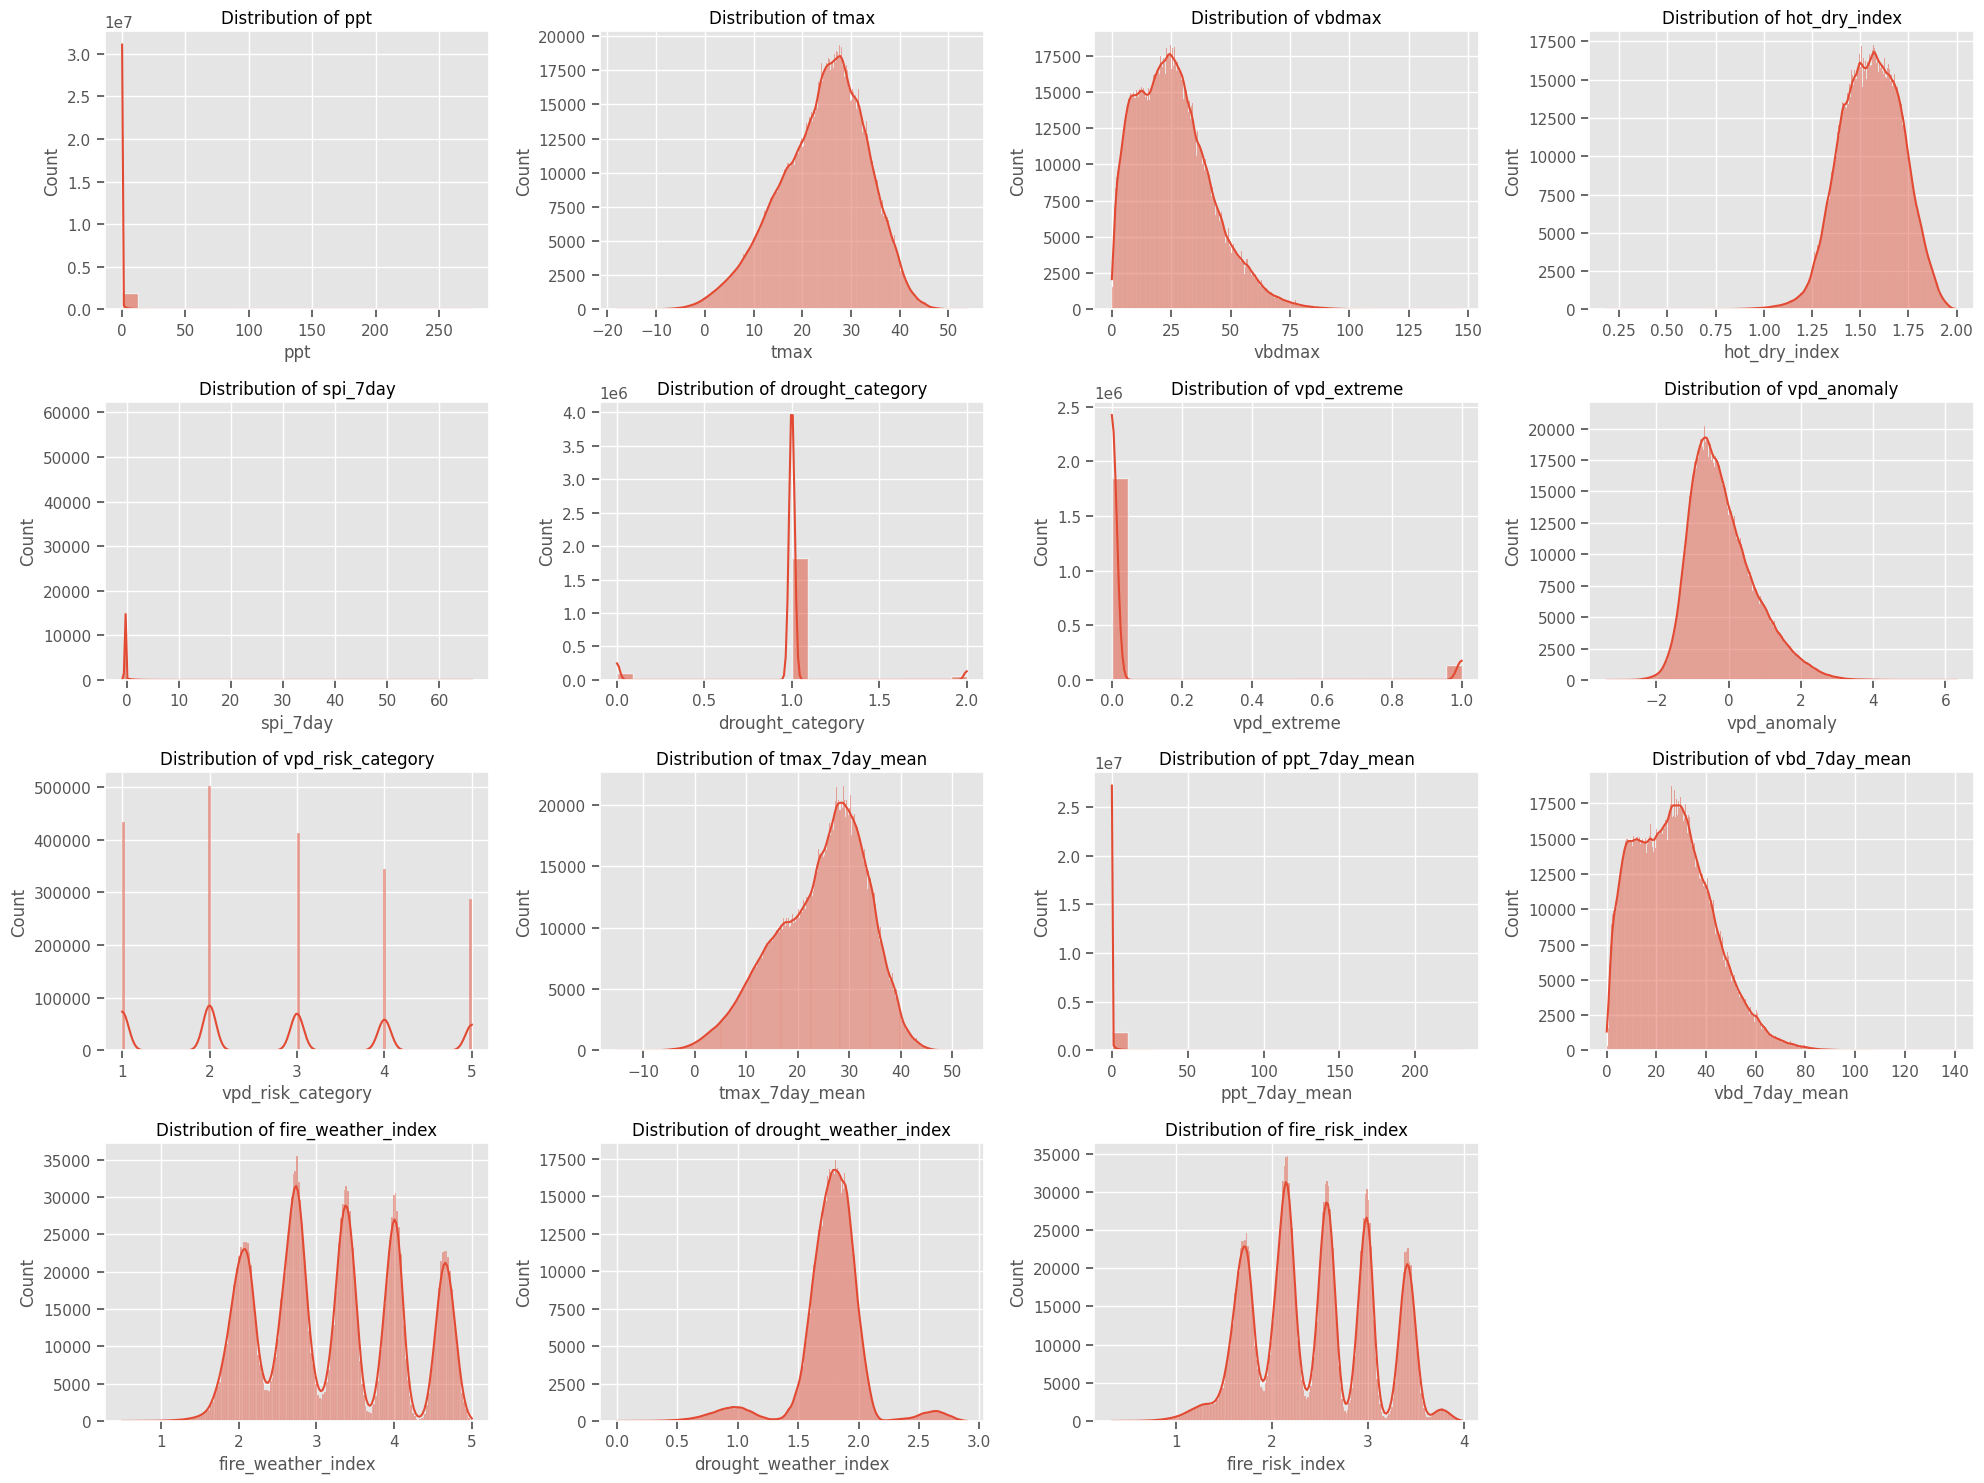

In [4]:
# Create histograms for numeric weather features
plt.figure(figsize=(20, 15))
for i, column in enumerate(weather_columns):
    if pd.api.types.is_numeric_dtype(weather_df[column]):
        plt.subplot(4, 4, i+1)
        sns.histplot(weather_df[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')
        plt.tight_layout()
plt.show()

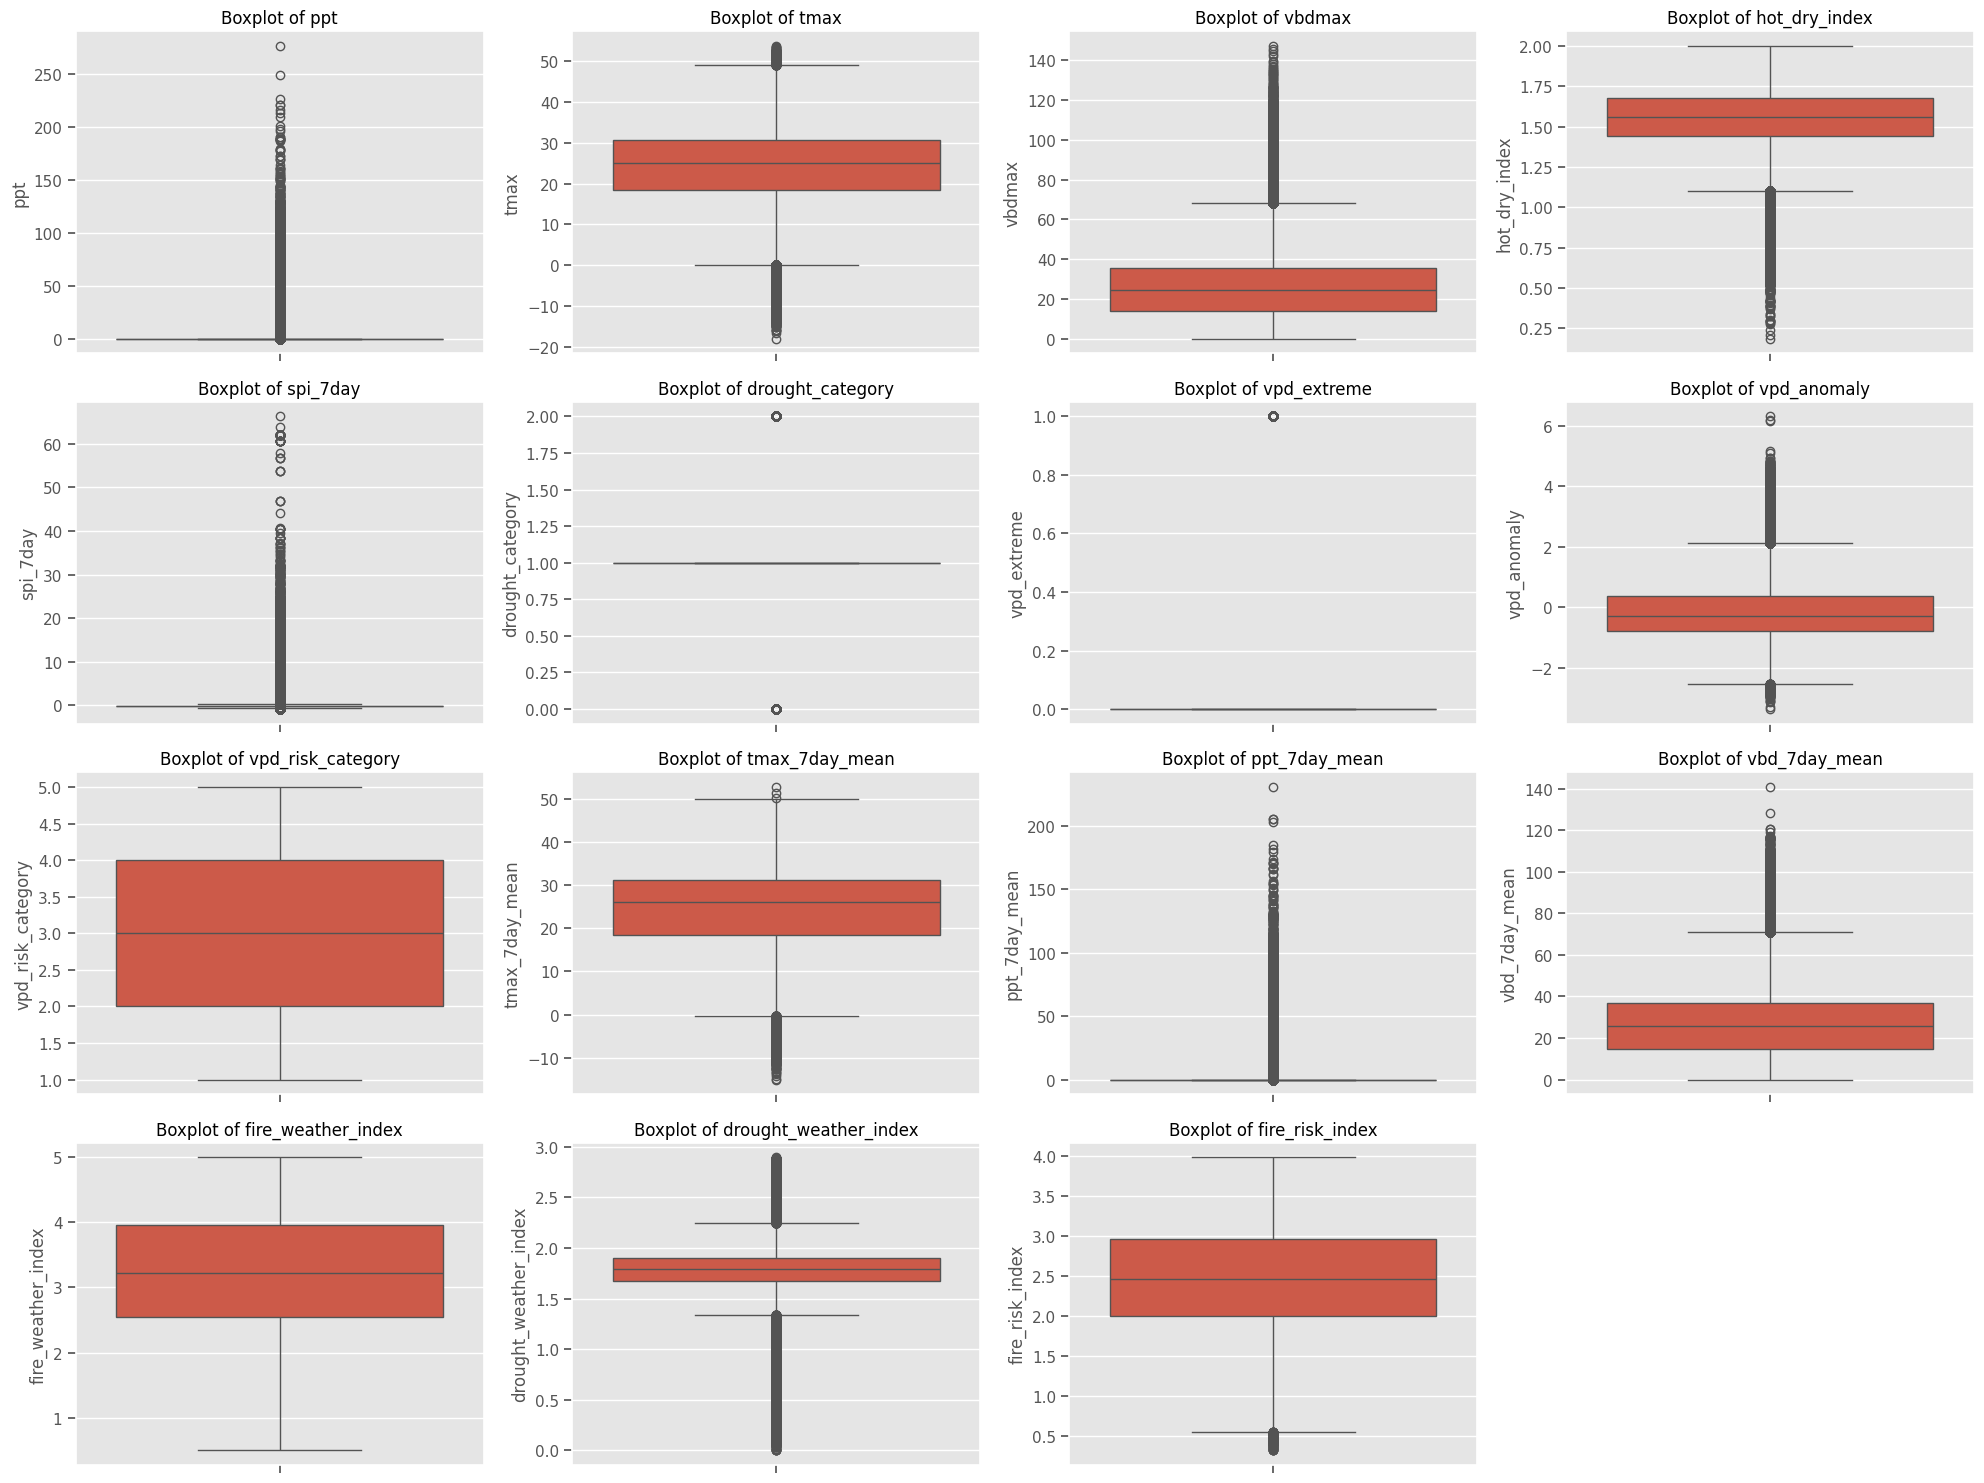

In [5]:
# Create boxplots to identify outliers in the data
plt.figure(figsize=(20, 15))
for i, column in enumerate(weather_columns):
    if pd.api.types.is_numeric_dtype(weather_df[column]):
        plt.subplot(4, 4, i+1)
        sns.boxplot(y=weather_df[column].dropna())
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
plt.show()

In [6]:
# Calculate skewness for each numeric feature
skewness = {}
for column in weather_columns:
    if pd.api.types.is_numeric_dtype(weather_df[column]):
        skewness[column] = weather_df[column].skew()

# Display skewness values
skewness_df = pd.DataFrame(list(skewness.items()), columns=['Feature', 'Skewness'])
skewness_df = skewness_df.sort_values('Skewness', ascending=False)
print("Skewness of features:")
skewness_df

Skewness of features:


,Feature,Skewness
4,spi_7day,23.507760
0,ppt,10.694860
10,ppt_7day_mean,9.935802
6,vpd_extreme,3.446364
7,vpd_anomaly,0.804835
2,vbdmax,0.778912
11,vbd_7day_mean,0.559631
8,vpd_risk_category,0.238110
12,fire_weather_index,0.172498
14,fire_risk_index,0.116301


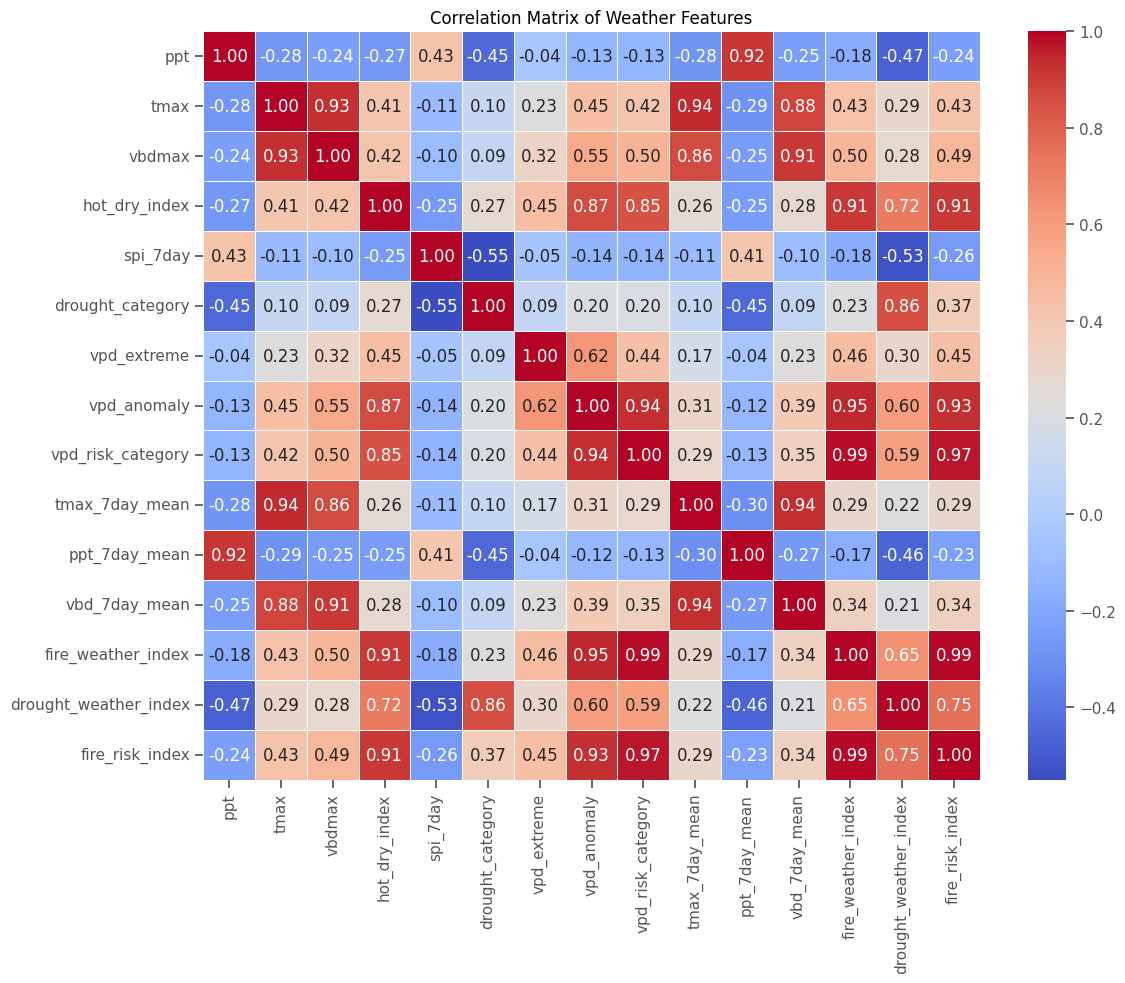

In [7]:
# Calculate correlation matrix
numeric_weather_df = weather_df.select_dtypes(include=[np.number])
corr_matrix = numeric_weather_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Weather Features')
plt.tight_layout()
plt.show()

## Normalization Techniques Comparison

Now we'll compare two common normalization techniques:

1. **Min-Max Scaling**: Scales features to a fixed range, usually [0,1]
2. **Z-score Normalization**: Transforms features to have mean=0 and standard deviation=1

We'll apply both techniques and compare their effects on our weather features.

In [23]:
# Select only numeric columns for normalization
numeric_columns = numeric_weather_df.columns.tolist()

# Initialize scalers
min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()
robust_scaler = RobustScaler()
power_transformer = PowerTransformer(method='yeo-johnson')  # Yeo-Johnson Transformation
quantile_transformer = QuantileTransformer(output_distribution='normal')  # Quantile Normalization

# Apply scalers
scaled_min_max = pd.DataFrame(min_max_scaler.fit_transform(numeric_weather_df), 
                             columns=numeric_columns)
scaled_z_score = pd.DataFrame(z_score_scaler.fit_transform(numeric_weather_df), 
                             columns=numeric_columns)
scaled_robust = pd.DataFrame(robust_scaler.fit_transform(numeric_weather_df), 
                            columns=numeric_columns)
scaled_yeo_johnson = pd.DataFrame(power_transformer.fit_transform(numeric_weather_df), 
                                 columns=numeric_columns)
scaled_quantile = pd.DataFrame(quantile_transformer.fit_transform(numeric_weather_df), 
                              columns=numeric_columns)

# Add prefixes to differentiate scaled versions
scaled_min_max = scaled_min_max.add_prefix('minmax_')
scaled_z_score = scaled_z_score.add_prefix('zscore_')
scaled_robust = scaled_robust.add_prefix('robust_')
scaled_yeo_johnson = scaled_yeo_johnson.add_prefix('yeojohnson_')
scaled_quantile = scaled_quantile.add_prefix('quantile_')

In [26]:
# Function to plot original vs normalized distributions
def plot_normalization_comparison(feature, original_df, minmax_df, zscore_df, robust_df, yeojohnson_df, quantile_df):
    plt.figure(figsize=(15, 10))  # Increased figure size to accommodate more subplots
    
    # Original data
    plt.subplot(2, 3, 1)  # Changed to a 2x3 grid to fit all methods
    sns.histplot(original_df[feature].dropna(), kde=True)
    plt.title(f'Original: {feature}')
    
    # Min-Max scaled
    plt.subplot(2, 3, 2)
    sns.histplot(minmax_df[f'minmax_{feature}'].dropna(), kde=True)
    plt.title(f'Min-Max Scaled: {feature}')
    
    # Z-score normalized
    plt.subplot(2, 3, 3)
    sns.histplot(zscore_df[f'zscore_{feature}'].dropna(), kde=True)
    plt.title(f'Z-Score Normalized: {feature}')
    
    # Robust scaled
    plt.subplot(2, 3, 4)
    sns.histplot(robust_df[f'robust_{feature}'].dropna(), kde=True)
    plt.title(f'Robust Scaled: {feature}')
    
    # Yeo-Johnson transformed
    plt.subplot(2, 3, 5)
    sns.histplot(yeojohnson_df[f'yeojohnson_{feature}'].dropna(), kde=True)
    plt.title(f'Yeo-Johnson: {feature}')
    
    # Quantile normalized
    plt.subplot(2, 3, 6)
    sns.histplot(quantile_df[f'quantile_{feature}'].dropna(), kde=True)
    plt.title(f'Quantile Normalized: {feature}')
    
    plt.tight_layout()
    plt.show()

# Pick a few representative features for visualization
sample_features = numeric_columns  # Take first 4 features
# for feature in sample_features:
#     plot_normalization_comparison(feature, numeric_weather_df, scaled_min_max, scaled_z_score, 
#                                  scaled_robust, scaled_yeo_johnson, scaled_quantile)

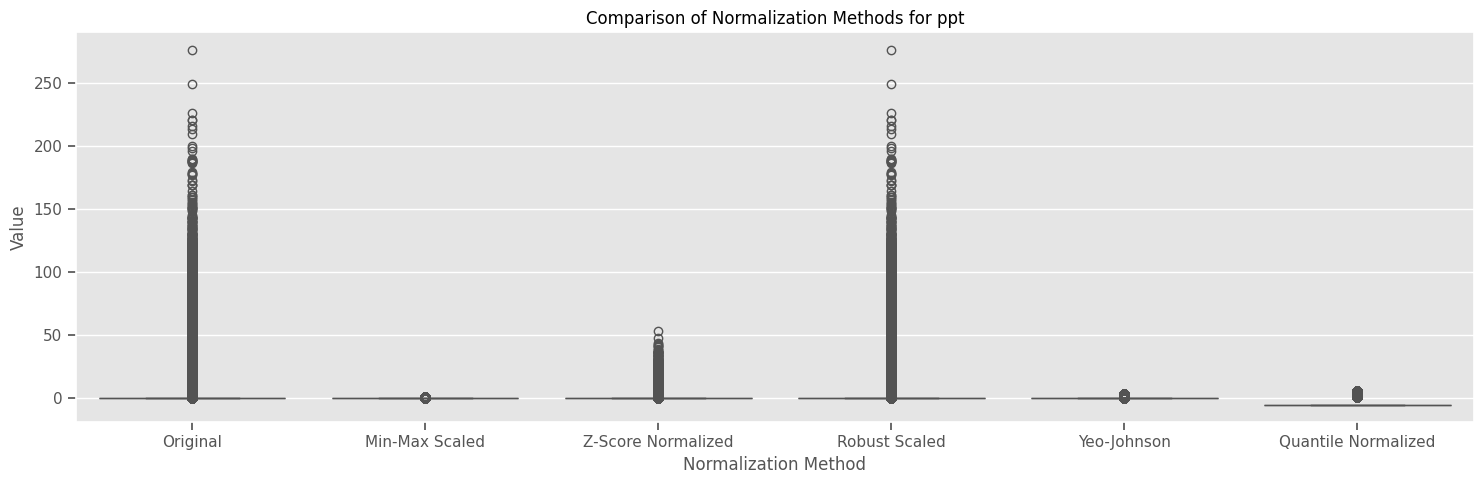

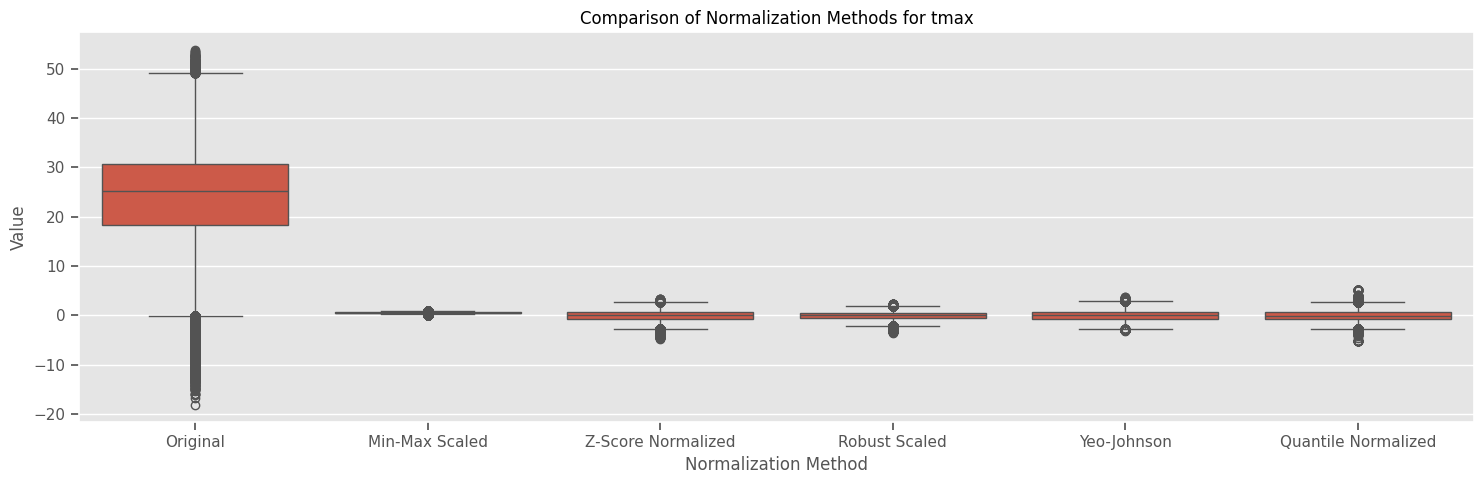

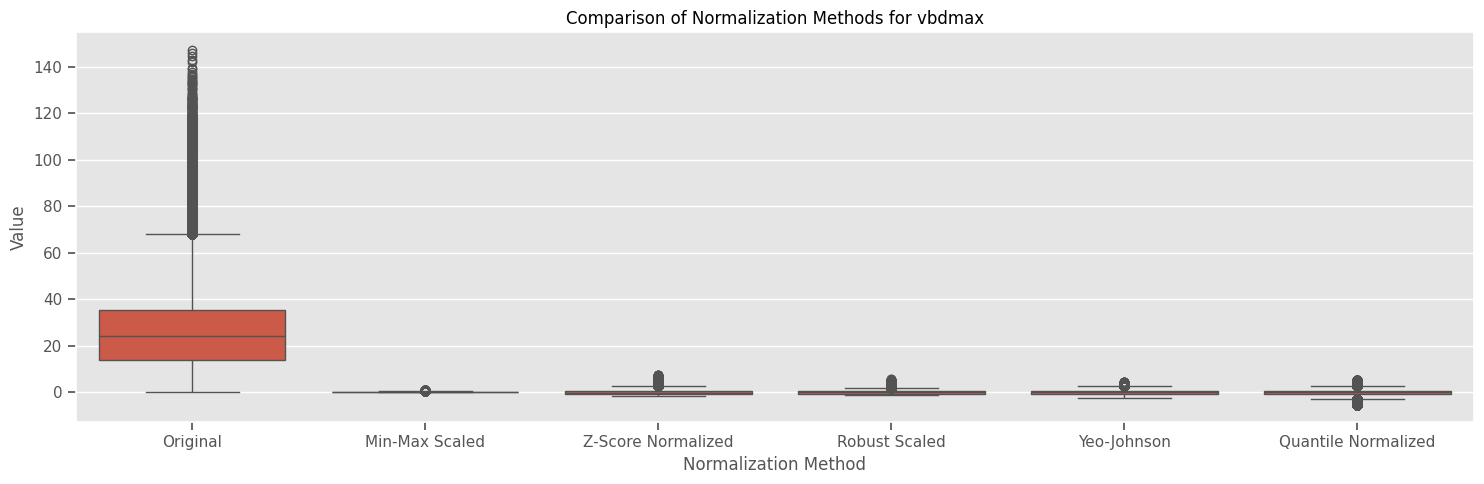

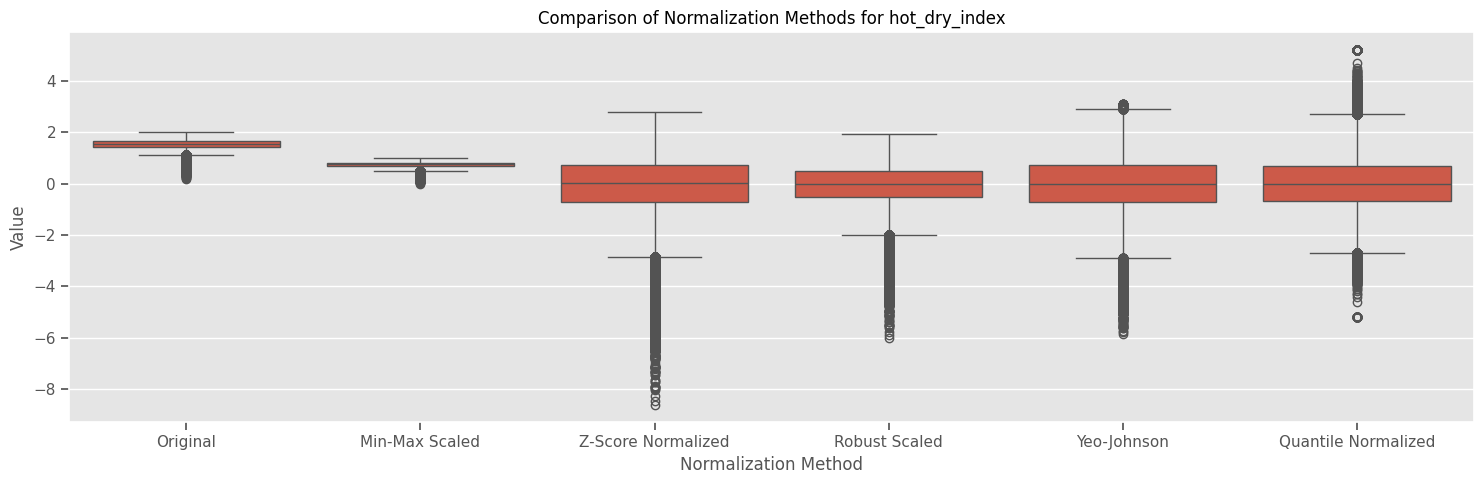

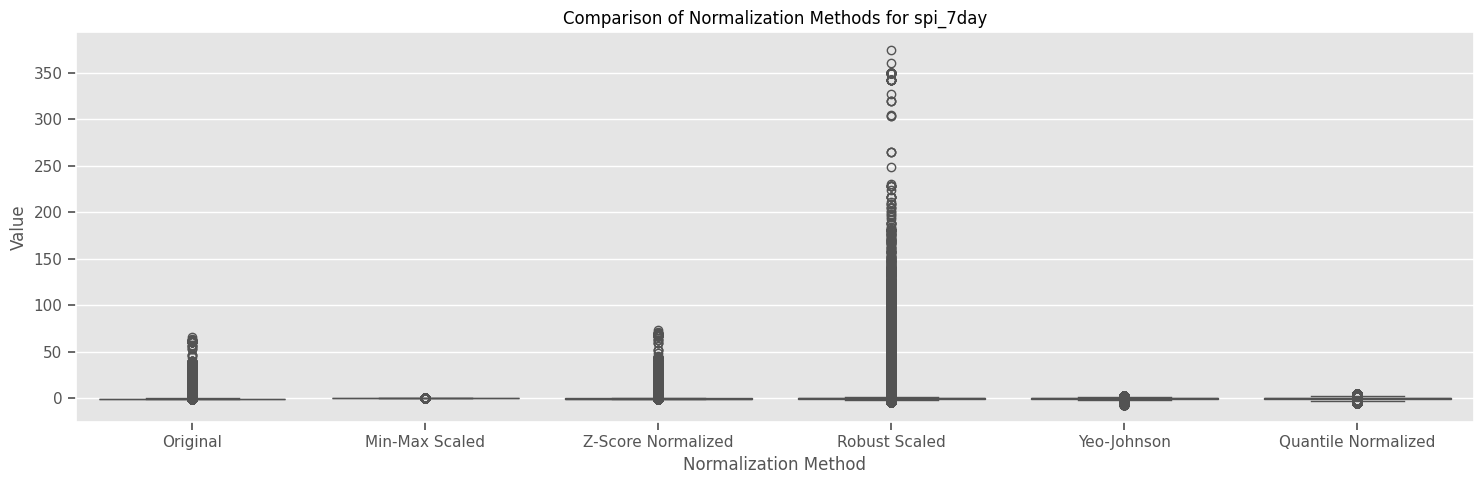

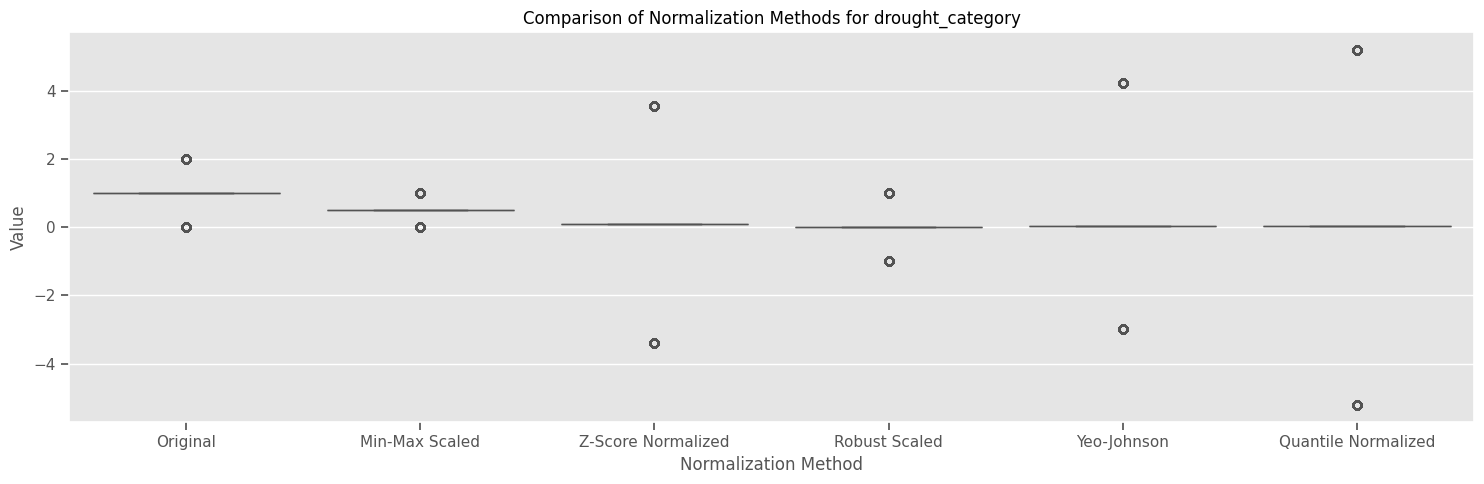

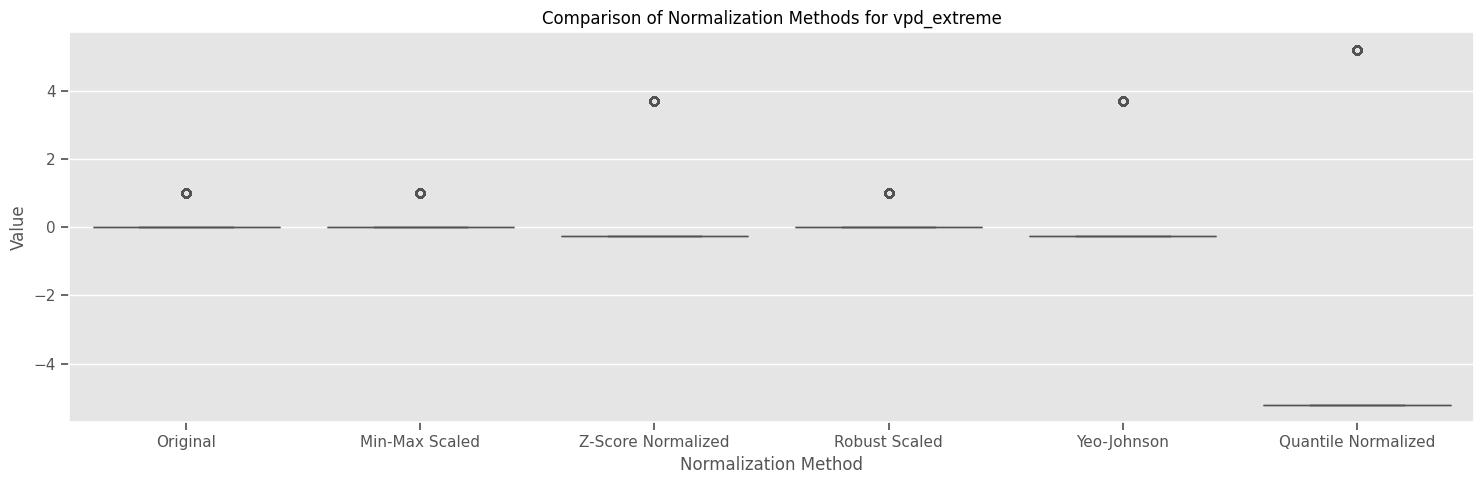

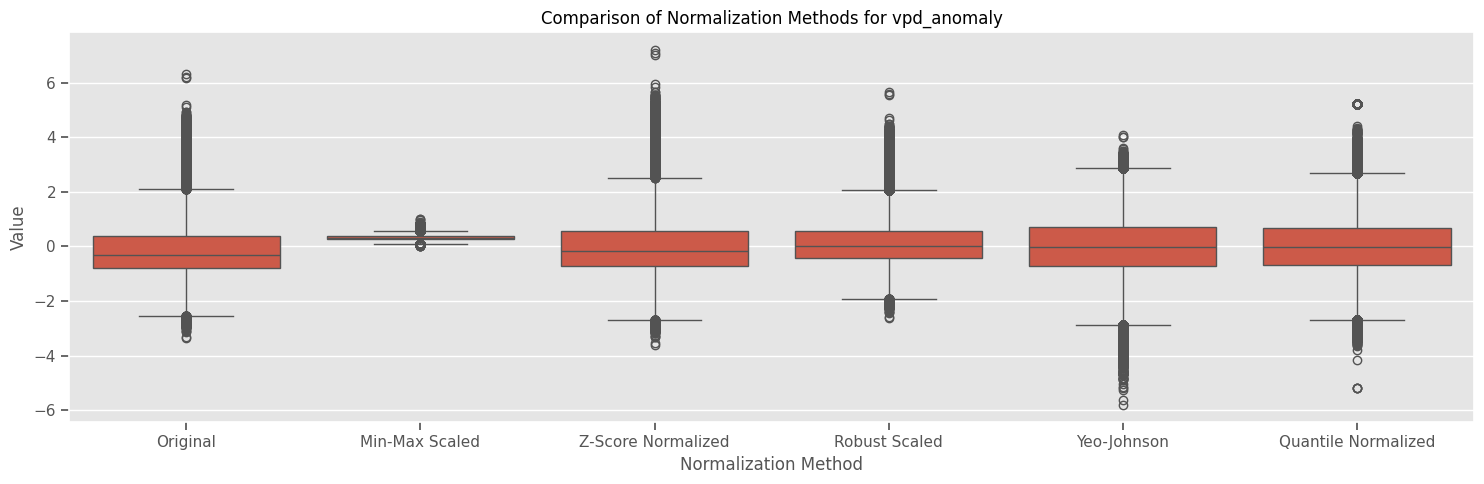

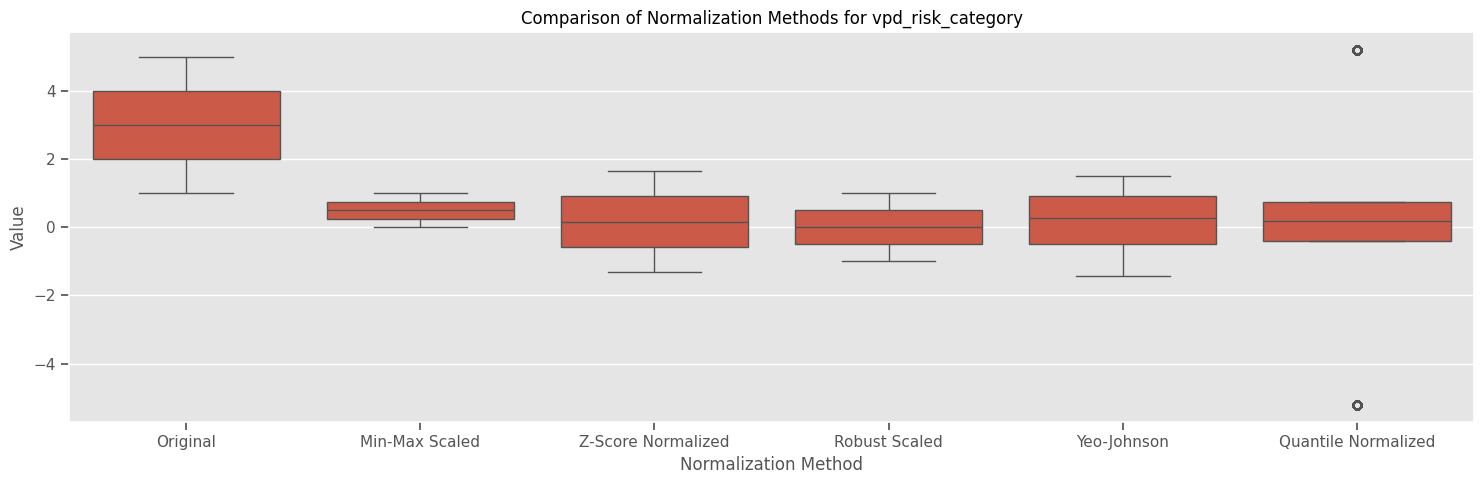

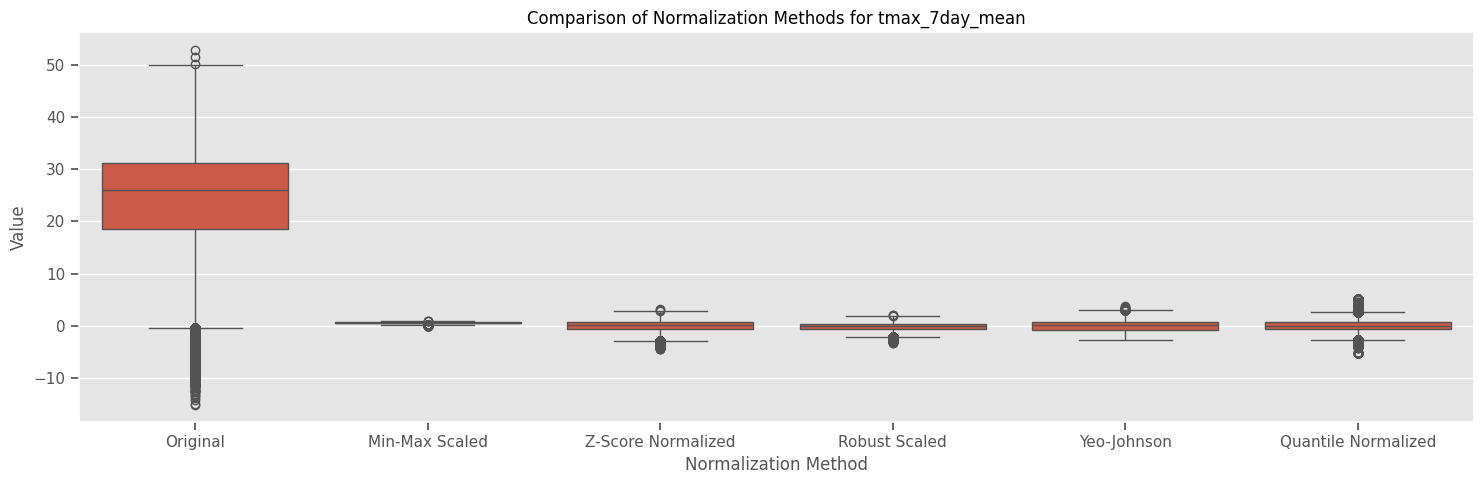

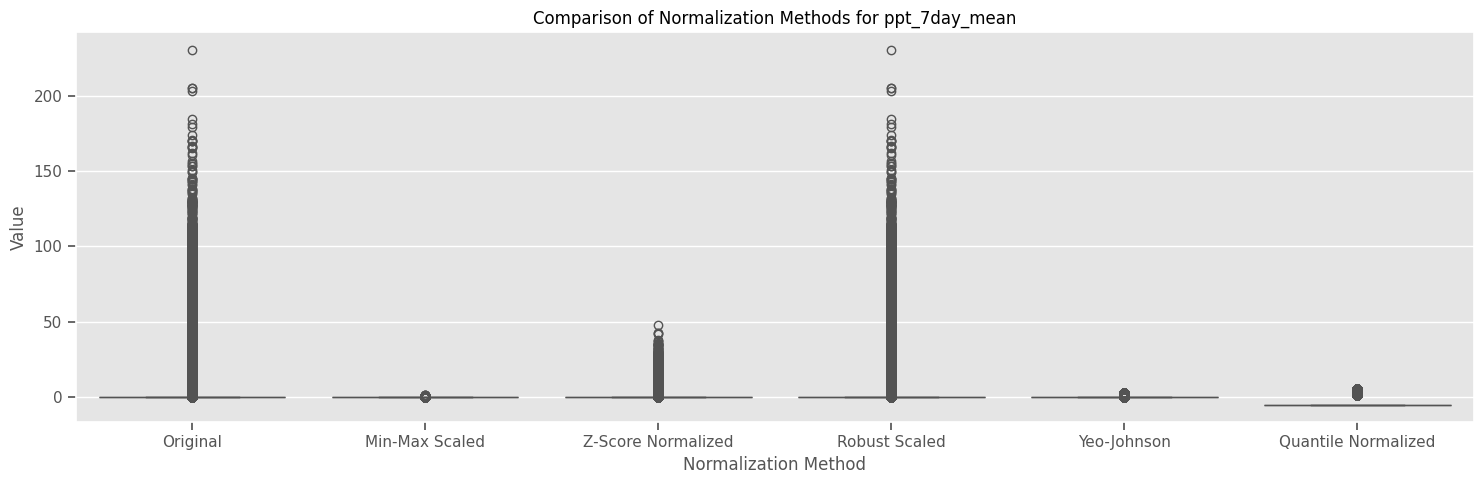

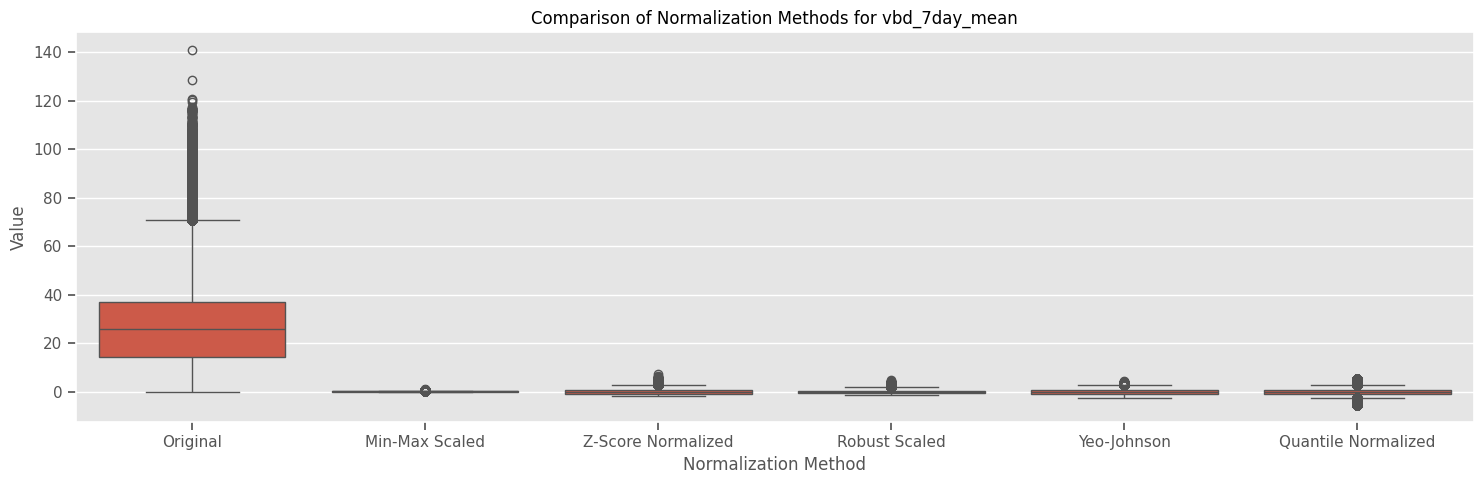

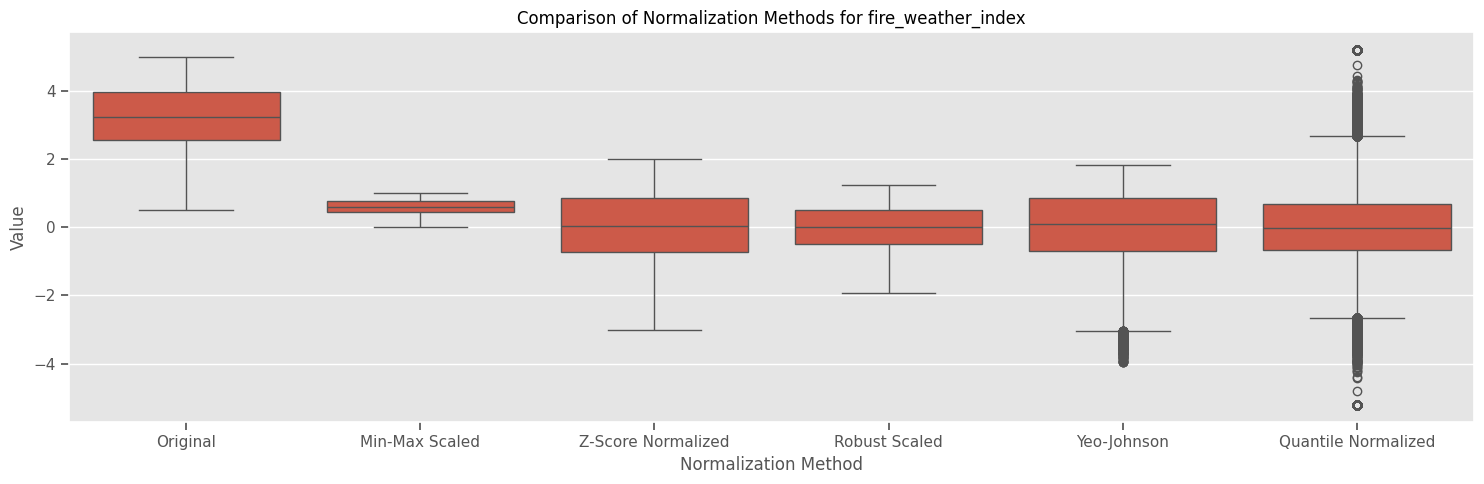

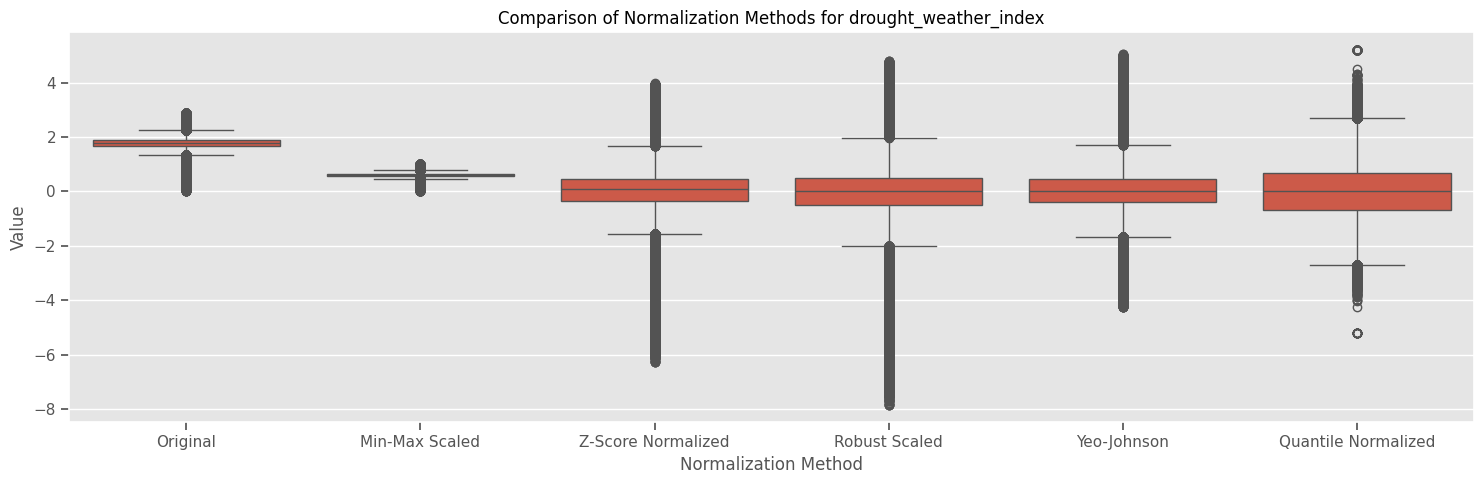

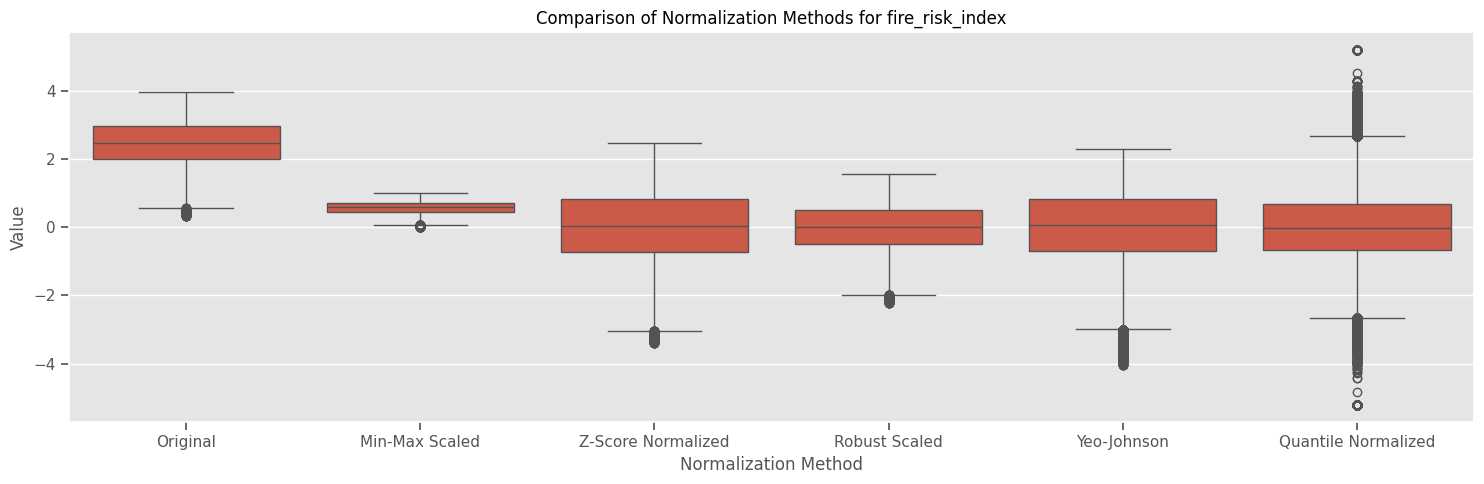

In [27]:
# Compare boxplots side by side
def plot_boxplot_comparison(feature, original_df, minmax_df, zscore_df, robust_df, yeojohnson_df, quantile_df):
    plt.figure(figsize=(15, 5))
    
    # Create a combined dataframe for boxplot
    combined_data = pd.DataFrame({
        'Original': original_df[feature],
        'Min-Max Scaled': minmax_df[f'minmax_{feature}'],
        'Z-Score Normalized': zscore_df[f'zscore_{feature}'],
        'Robust Scaled': robust_df[f'robust_{feature}'],
        'Yeo-Johnson': yeojohnson_df[f'yeojohnson_{feature}'],
        'Quantile Normalized': quantile_df[f'quantile_{feature}']
    })
    
    # Melt the dataframe for easier plotting
    melted_data = pd.melt(combined_data, var_name='Normalization Method', value_name='Value')
    
    # Create the boxplot
    sns.boxplot(x='Normalization Method', y='Value', data=melted_data)
    plt.title(f'Comparison of Normalization Methods for {feature}')
    plt.tight_layout()
    plt.show()

# Plot boxplots for the same sample features
for feature in sample_features:
    plot_boxplot_comparison(feature, numeric_weather_df, scaled_min_max, scaled_z_score, 
                           scaled_robust, scaled_yeo_johnson, scaled_quantile)

In [28]:
# Compare statistical properties before and after normalization
results = []

for feature in numeric_columns:
    original_stats = {
        'Feature': feature,
        'Method': 'Original',
        'Min': numeric_weather_df[feature].min(),
        'Max': numeric_weather_df[feature].max(),
        'Mean': numeric_weather_df[feature].mean(),
        'Std': numeric_weather_df[feature].std(),
        'Skewness': numeric_weather_df[feature].skew()
    }
    
    minmax_stats = {
        'Feature': feature,
        'Method': 'Min-Max',
        'Min': scaled_min_max[f'minmax_{feature}'].min(),
        'Max': scaled_min_max[f'minmax_{feature}'].max(),
        'Mean': scaled_min_max[f'minmax_{feature}'].mean(),
        'Std': scaled_min_max[f'minmax_{feature}'].std(),
        'Skewness': scaled_min_max[f'minmax_{feature}'].skew()
    }
    
    zscore_stats = {
        'Feature': feature,
        'Method': 'Z-Score',
        'Min': scaled_z_score[f'zscore_{feature}'].min(),
        'Max': scaled_z_score[f'zscore_{feature}'].max(),
        'Mean': scaled_z_score[f'zscore_{feature}'].mean(),
        'Std': scaled_z_score[f'zscore_{feature}'].std(),
        'Skewness': scaled_z_score[f'zscore_{feature}'].skew()
    }
    
    results.extend([original_stats, minmax_stats, zscore_stats])

# Create DataFrame with results
comparison_df = pd.DataFrame(results)

# Display aggregated results by method
pd.pivot_table(comparison_df, 
               values=['Min', 'Max', 'Mean', 'Std', 'Skewness'], 
               index='Method', 
               aggfunc='mean')

,Max,Mean,Min,Skewness,Std
Method,,,,,
Min-Max,1.000000,3.627275e-01,0.000000,3.161606,0.127206
Original,66.374923,7.763358e+00,-2.354464,3.161606,4.327956
Z-Score,14.884789,-6.649224e-17,-2.912283,3.161606,1.000000


In [29]:
# Function to calculate percentage of outliers in a feature
def outlier_percentage(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return (len(outliers) / len(data)) * 100

# Calculate outliers percentage for each feature and normalization method
outlier_results = []

for feature in numeric_columns:
    original_pct = outlier_percentage(numeric_weather_df[feature])
    minmax_pct = outlier_percentage(scaled_min_max[f'minmax_{feature}'])
    zscore_pct = outlier_percentage(scaled_z_score[f'zscore_{feature}'])
    
    outlier_results.append({
        'Feature': feature,
        'Original (%)': original_pct,
        'Min-Max (%)': minmax_pct,
        'Z-Score (%)': zscore_pct
    })

# Display outlier percentages
outlier_df = pd.DataFrame(outlier_results)
outlier_df

,Feature,Original (%),Min-Max (%),Z-Score (%)
0,ppt,12.232464,12.232464,12.232464
1,tmax,0.578493,0.578493,0.578493
2,vbdmax,1.362648,1.362648,1.362648
3,hot_dry_index,0.473767,0.473767,0.473767
4,spi_7day,9.504843,9.504843,9.504843
5,drought_category,8.329064,8.329064,8.329064
6,vpd_extreme,6.754489,6.754489,6.754489
7,vpd_anomaly,1.894512,1.894512,1.894512
8,vpd_risk_category,0.000000,0.000000,0.000000
9,tmax_7day_mean,0.301851,0.301851,0.301851


## Conclusion and Recommendations

Based on our analysis, we can make the following observations about the weather features and normalization techniques:

1. **Data Distribution Analysis**:
   - Several weather features show significant skewness and outliers
   - Some features have different scales and ranges

2. **Min-Max Scaling**:
   - Preserves the shape of the original distribution but bounds values between 0 and 1
   - Doesn't handle outliers well, as they compress the majority of data points
   - Good for features where the relative relationships between values matter

3. **Z-Score Normalization**:
   - Centers data around 0 with unit standard deviation
   - Better handles outliers, as they have less impact on the overall distribution
   - Better for features with many outliers or significantly skewed distributions

4. **Recommended Approach**:
   - For features with minimal outliers and relatively normal distributions: Min-Max scaling may be appropriate
   - For features with significant outliers or skewed distributions: Z-score normalization is likely better
   - Consider a hybrid approach based on each feature's characteristics

5. **Next Steps**:
   - Consider robust scaling for features with extreme outliers
   - Test model performance with different normalization techniques
   - For temporal features, consider specialized normalization techniques that preserve time-related patterns

In [ ]:
# Create a function to recommend normalization method for each feature
def recommend_normalization(feature, skew_threshold=1.0, outlier_threshold=10.0):
    skewness = numeric_weather_df[feature].skew()
    outlier_pct = outlier_percentage(numeric_weather_df[feature])
    
    if abs(skewness) > skew_threshold or outlier_pct > outlier_threshold:
        return 'Z-Score'
    else:
        return 'Min-Max'

# Generate recommendations for each feature
recommendations = []
for feature in numeric_columns:
    recommendation = recommend_normalization(feature)
    recommendations.append({
        'Feature': feature,
        'Skewness': numeric_weather_df[feature].skew(),
        'Outlier %': outlier_percentage(numeric_weather_df[feature]),
        'Recommended Method': recommendation
    })

# Display recommendations
recommendation_df = pd.DataFrame(recommendations)
recommendation_df.sort_values('Recommended Method')

In [ ]:
# Create a summary plot showing the recommended normalization method for each feature
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Skewness', y='Outlier %', hue='Recommended Method', 
              data=recommendation_df, s=100)

# Add feature names as labels
for i, row in recommendation_df.iterrows():
    plt.annotate(row['Feature'], 
                (row['Skewness'], row['Outlier %']),
                xytext=(5, 5), textcoords='offset points')

plt.axhline(y=10, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=-1, color='gray', linestyle='--', alpha=0.5)

plt.title('Feature Characteristics and Recommended Normalization Methods')
plt.xlabel('Skewness')
plt.ylabel('Outlier Percentage')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()